# Predicting startup success using Machine learning 
by Dhruv Khanna

[Github](https://github.com/dhruvkhanna98/Predicting-startup-success-using-machine-learning)

### Introduction:

In this project, my aim is to use a crunchbase to predict if a startup is going to successful or not. To do so, I will be using a field in the dataset 'status' which contains three distinct values - 'acquired', 'closed', 'operating'. I will be considering an acquired startup as being successful (1) and closed startup (0) to be unsuccessful. To do so I will be comparing the machine learning models - Logistic regression, Decision trees and Random forest on accuracy and ROC to figure out the best model. 

In my classification, I will only be considering startups in the USA which are either acquired or closed. 

### Imports

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection, ensemble)
from helpers import plot_roc

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import sklearn.ensemble


# Options
%matplotlib inline
pd.set_option('display.max_columns', 500)

### Loading the data

In [3]:
df = pd.read_csv('./investments_VC.csv', encoding='latin1')

## Data cleaning and processing
- Fix column names (remove spaces)
- Remove unnecessary columns
- Fix column datatypes (total_funding_usd)
- Normalize column values in funding_columns [seed, venture,... round_G]
- Filter df country to US, and only include closed and acquired companies
- Fill in/drop rows/columns with NAN data

In [4]:
# Peak data
df.head(10)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/organization/club-domains,.Club Domains,http://nic.club/,|Software|,Software,"70,00,000",NaN,USA,FL,Ft. Lauderdale,Oakland Park,1.0,2011-10-10,2011-10,2011-Q4,2011.0,2013-05-31,2013-05-31,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0
6,/organization/fox-networks,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,"49,12,393",closed,ARG,NaN,Buenos Aires,Buenos Aires,1.0,NaN,NaN,NaN,NaN,2007-01-16,2007-01-16,0.0,0.0,0.0,4912393.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,/organization/0-6-com,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,"20,00,000",operating,NaN,NaN,NaN,NaN,1.0,2007-01-01,2007-01,2007-Q1,2007.0,2008-03-19,2008-03-19,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1.0,2010-01-01,2010-01,2010-Q1,2010.0,2014-07-24,2014-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,/organization/01games-technology,01Games Technology,http://www.01games.hk/,|Games|,Games,"41,250",operating,HKG,NaN,Hong Kong,Hong Kong,1.0,NaN,NaN,NaN,NaN,2014-07-01,2014-07-01,41250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(54294, 39)

In [6]:
# Look at columns
(print (list (df.columns)))

['permalink', 'name', 'homepage_url', 'category_list', ' market ', ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region', 'city', 'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter', 'founded_year', 'first_funding_at', 'last_funding_at', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']


In [7]:
# remove spaces from column names
df.columns = df.columns.str.replace(' ', '')

In [8]:
# Look at column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4   market                45470 non-null  object 
 5   funding_total_usd     49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [9]:
# Look at values in status (the target var to be predicted)
df['status'].value_counts()

operating    41829
acquired      3692
closed        2603
Name: status, dtype: int64

In [10]:
# Filter df to only include Acquired (1) and closed (0) and only USA as the country
df = df[(df['status'].isin(['acquired', 'closed'])) & (df['country_code'] == 'USA')]

# Change to binary
df['status'] = df.status.map({'acquired': 1, 'closed': 0})

# Rename status to is_acquired
df.rename(columns = {'status': 'is_acquired'}, inplace=True)

In [11]:
# Remove spaces in market
df['market'] = df['market'].str.replace(' ', '')

In [12]:
# Make funding total usd a numerical variable
df['funding_total_usd'] = (df['funding_total_usd']
                            .str.replace('-', '0')  # Replace '-' with '0's
                            .str.replace(' ', '')   # Remove spaces
                            .str.replace(',', '')   # Remove commas
                               .astype(np.float64)) # convert to float64

df.describe()

,funding_total_usd,is_acquired,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,4.248000e+03,4248.000000,4248.000000,3461.000000,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4.248000e+03,4248.0
mean,1.807530e+07,0.655603,1.947740,2004.819994,1.718808e+05,1.231537e+07,2.091115e+03,8.938497e+04,1.163098e+04,1.882393e+06,7.331712e+04,5.368745e+04,1.741581e+06,1.462773e+06,2.689030e+05,1.728764e+03,5.649718e+02,1.942412e+06,3.023834e+06,2.307725e+06,1.276739e+06,5.133235e+05,2.183945e+05,1.706685e+04,0.0
std,1.028812e+08,0.475227,1.393449,6.623327,8.217077e+05,2.745904e+07,9.316723e+04,1.313457e+06,2.458870e+05,2.753359e+07,4.865783e+05,1.788311e+06,2.137529e+07,7.369721e+07,1.452092e+07,1.126751e+05,3.682298e+04,6.691378e+06,9.926681e+06,8.464259e+06,7.849614e+06,5.325529e+06,5.162022e+06,8.054168e+05,0.0
min,0.000000e+00,0.000000,1.000000,1911.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,5.000000e+05,0.000000,1.000000,2002.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,4.232786e+06,1.000000,1.000000,2006.000000,0.000000e+00,3.060000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
75%,1.600000e+07,1.000000,2.000000,2009.000000,0.000000e+00,1.431685e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
max,5.700000e+09,1.000000,15.000000,2014.000000,2.500000e+07,7.750000e+08,5.500000e+06,4.223000e+07,1.352014e+07,1.200000e+09,2.000000e+07,9.980000e+07,7.710000e+08,4.700000e+09,9.200000e+08,7.343789e+06,2.400000e+06,2.250000e+08,3.500000e+08,2.000000e+08,2.200000e+08,2.200000e+08,2.860000e+08,5.000000e+07,0.0


In [13]:
# Peak at database
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,is_acquired,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,1,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,/organization/1000memories,1000memories,http://1000memories.com,|Curated Web|,CuratedWeb,2535000.0,1,USA,CA,SF Bay Area,San Francisco,2.0,2010-07-01,2010-07,2010-Q3,2010.0,2010-01-01,2011-02-16,15000.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,/organization/100plus,100Plus,http://www.100plus.com,|Analytics|,Analytics,1250000.0,1,USA,CA,SF Bay Area,San Francisco,2.0,2011-09-16,2011-09,2011-Q3,2011.0,2011-11-02,2011-11-30,750000.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,/organization/10bestthings,10BestThings,http://10bestthings.com,|Curated Web|,CuratedWeb,50000.0,0,USA,OH,Cleveland,Cleveland,1.0,2009-04-01,2009-04,2009-Q2,2009.0,2009-04-01,2009-04-01,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,/organization/12society,12Society,http://www.12Society.com,|E-Commerce|,E-Commerce,0.0,1,USA,CA,Los Angeles,West Hollywood,1.0,2012-01-01,2012-01,2012-Q1,2012.0,2012-04-05,2012-04-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Look at null columns
df.isnull().sum()

permalink                 0
name                      0
homepage_url            194
category_list           128
market                  128
funding_total_usd         0
is_acquired               0
country_code              0
state_code                0
region                    0
city                      3
funding_rounds            0
founded_at              784
founded_month           787
founded_quarter         787
founded_year            787
first_funding_at          0
last_funding_at           0
seed                      0
venture                   0
equity_crowdfunding       0
undisclosed               0
convertible_note          0
debt_financing            0
angel                     0
grant                     0
private_equity            0
post_ipo_equity           0
post_ipo_debt             0
secondary_market          0
product_crowdfunding      0
round_A                   0
round_B                   0
round_C                   0
round_D                   0
round_E             

In [15]:
# Keep only relevent columns
keep_cols = ['market', 'funding_total_usd', 'is_acquired', 'state_code',
             'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
             'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
             'private_equity', 'post_ipo_equity', 'post_ipo_debt',
             'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
             'round_C', 'round_D', 'round_E', 'round_F', 'round_G']


# Update database with new columns
df = df[keep_cols].copy()

In [16]:
# Peak at new database
df.head()

,market,funding_total_usd,is_acquired,state_code,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G
0,News,1750000.0,1,NY,1.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,CuratedWeb,2535000.0,1,CA,2.0,15000.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2520000.0,0.0,0.0,0.0,0.0,0.0,0.0
27,Analytics,1250000.0,1,CA,2.0,750000.0,500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,CuratedWeb,50000.0,0,OH,1.0,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,E-Commerce,0.0,1,CA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df.columns

Index(['market', 'funding_total_usd', 'is_acquired', 'state_code',
       'funding_rounds', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G'],
      dtype='object')

In [18]:
funding_cols = ['seed','venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
                'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
                'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
                'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G']

# Normalize funding columns with total funding
for col in funding_cols:
    df[col] = df[col] / df['funding_total_usd']
    

# Fill nan values with 0s
df[funding_cols] = df[funding_cols].fillna(0).copy()

In [19]:
df.isna().sum()

market                  128
funding_total_usd         0
is_acquired               0
state_code                0
funding_rounds            0
seed                      0
venture                   0
equity_crowdfunding       0
undisclosed               0
convertible_note          0
debt_financing            0
angel                     0
grant                     0
private_equity            0
post_ipo_equity           0
post_ipo_debt             0
secondary_market          0
product_crowdfunding      0
round_A                   0
round_B                   0
round_C                   0
round_D                   0
round_E                   0
round_F                   0
round_G                   0
dtype: int64

In [20]:
# Drop NaN value rows in market
df.dropna(subset=['market'], axis=0, inplace=True)

## Visualizations
 - Is target market related to startup success?
 - Is state_code related to startup success?

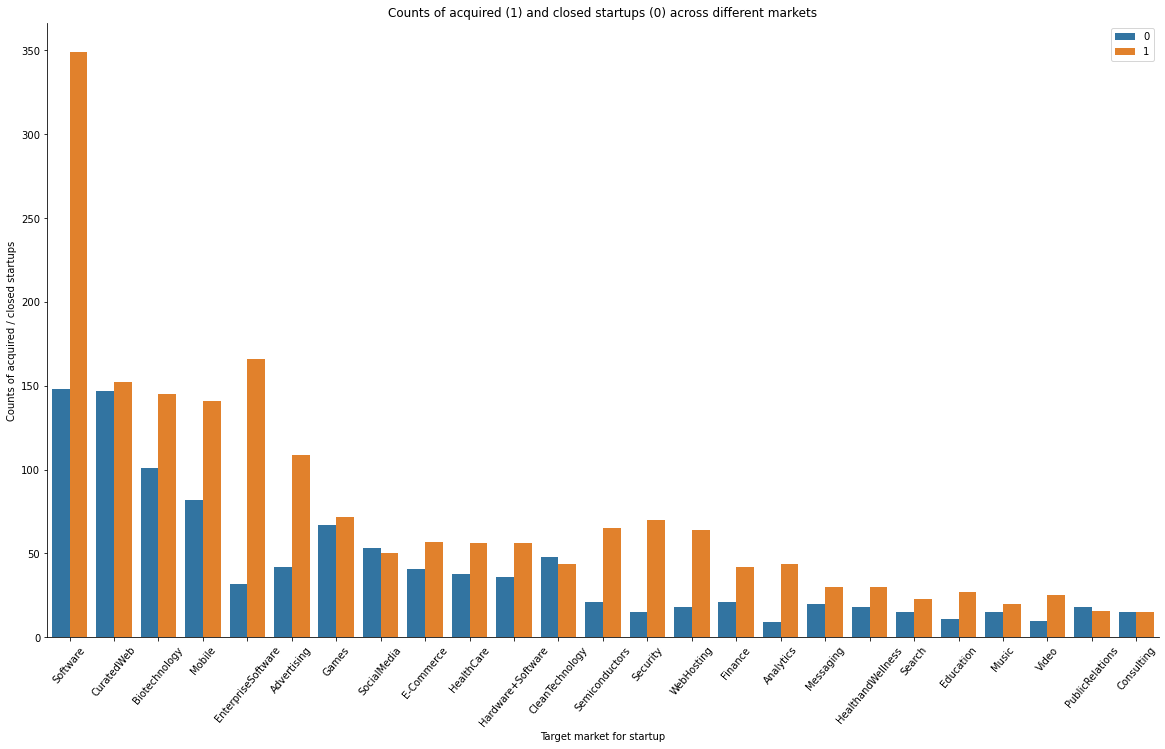

In [21]:
'''
correlation of market vs success
'''

# Get top 10 market categories for visualization (There are too many categories to visualize, so I'm looking a subset here)
tdf = df.groupby('market')['is_acquired'].count().reset_index()
tdf.columns = ['market', 'count']
top_25_markets = tdf.sort_values('count', ascending=False)['market'].values[:25]

# Filter by top 25 markets
tdf = df[df['market'].isin(top_25_markets)]

# Create plot
g = sns.catplot(x='market',hue='is_acquired',data=tdf, kind="count", legend=False, order=top_25_markets)
ax = g.ax
g.fig.set_size_inches(20,10)
g.set_xlabels('Target market for startup')
g.set_ylabels('Counts of acquired / closed startups')
g.set_xticklabels(rotation=50)
ax.set_title('Counts of acquired (1) and closed startups (0) across different markets')
ax.legend()

***Observation***: Based on the above data it is clear that markets which have software products (Software, Enterprice software, etc) would have a higher likelyhood of success. This does make sense intuitively as software companies compared to other industries would have lower overall costs compared to companies that manufacter products.

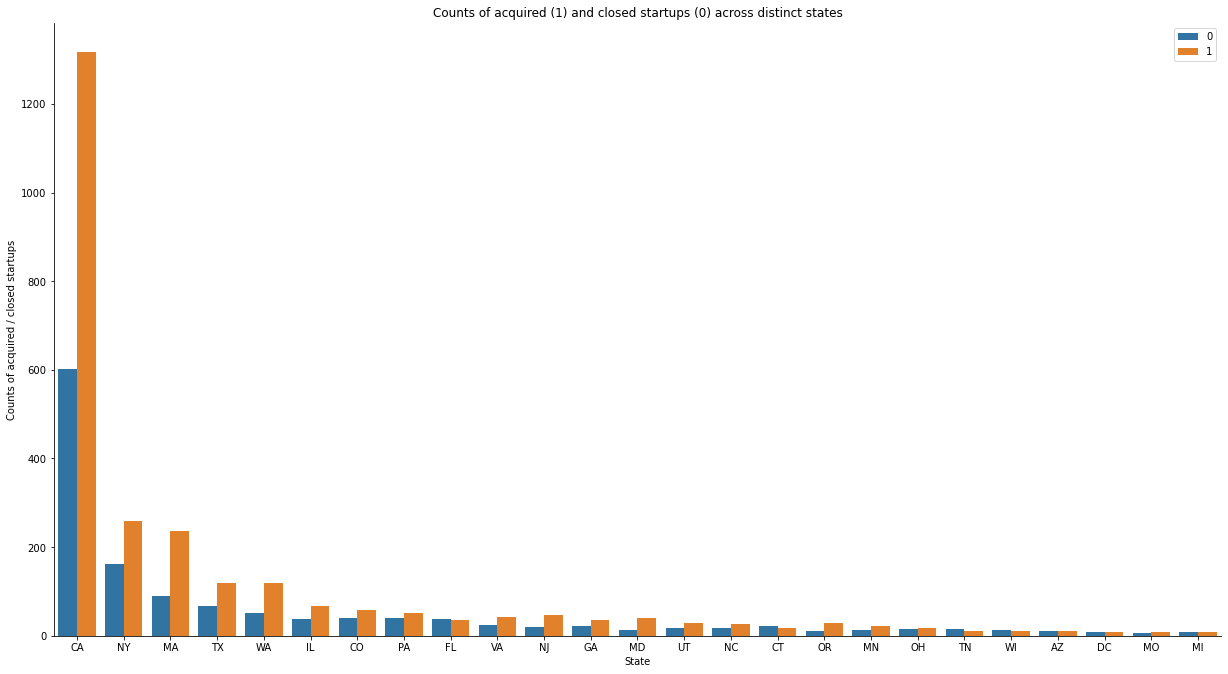

In [22]:
'''
correlation of state_code vs success
'''

# Get top 10 market categories for visualization (There are too many categories to visualize, so I'm looking a subset here)
tdf = df.groupby('state_code')['is_acquired'].count().reset_index()
tdf.columns = ['state_code', 'count']
top_25_states = tdf.sort_values('count', ascending=False)['state_code'].values[:25]

# Filter by top 25 states
tdf = df[df['state_code'].isin(top_25_states)]

# Create plot
g = sns.catplot(x='state_code',hue='is_acquired',data=tdf,kind="count", legend=False, order=top_25_states)
ax = g.ax
g.fig.set_size_inches(20,10)
g.set_xlabels('State')
g.set_ylabels('Counts of acquired / closed startups')
ax.set_title('Counts of acquired (1) and closed startups (0) across distinct states')
ax.legend()

***Observation***: State does seem to have an influence on company sucess, particularly in larger states like CA, NY, etc. The data may also be biased because there are a lot more datapoints (startups) in these locations, but the trend is clear. Intuitively it does make sense for location to be a factor for success. (CA for eg would have a higher quality of overall talent and would have greater access to VC funding)

## Feature Engineering

**Goal:** Based on the above findings (sucess depends on market as well as state), I think it'll be a good idea to convert categorical features into numerical features for modelling

Features added:
- pct_acquired_market: Represents percentage of startups acquired in the given market
- pct_acquired_state: Represents percentage of startups acquired in the given state

In [23]:
'''
pct_acquired market
'''


# Group by market, and get num_acquired and total in market
tdf = df.groupby('market').agg({'is_acquired': ['sum', 'count']}).reset_index().copy()

# Update columns of df
tdf.columns = ['market', 'num_acquired', 'total']

# Add column for pct_acquired_market
tdf['pct_acquired_market'] = tdf['num_acquired']/tdf['total']

# Merge with df
df = df.merge(right=tdf[['market','pct_acquired_market']], on='market', how='left')

# Drop market column as it is not needed anymore
df.drop('market', axis=1, inplace=True)

In [24]:
'''
pct_acquired_state
'''

# Group by state_code, and get num_acquired and total in state_code
tdf = df.groupby('state_code').agg({'is_acquired': ['sum', 'count']}).reset_index().copy()

# Update columns of tdf
tdf.columns = ['state_code', 'num_acquired', 'total']

# Add column for pct_acquired_state
tdf['pct_acquired_state'] = tdf['num_acquired']/tdf['total']

# Merge with df
df = df.merge(right=tdf[['state_code','pct_acquired_state']], on='state_code', how='left')

# Drop state_code column as it is not needed anymore
df.drop('state_code', axis=1, inplace=True)

In [25]:
df.head(10)

,funding_total_usd,is_acquired,funding_rounds,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,pct_acquired_market,pct_acquired_state
0,1750000.0,1,1.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.653846,0.616667
1,2535000.0,1,2.0,0.005917,0.994083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.994083,0.0,0.0,0.0,0.0,0.0,0.0,0.508361,0.686295
2,1250000.0,1,2.0,0.600000,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.830189,0.686295
3,50000.0,0,1.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.508361,0.515152
4,0.0,1,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.581633,0.686295
5,14000000.0,1,1.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.702213,0.724771
6,0.0,0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.695906
7,50000.0,0,1.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.581633,0.686295
8,3452941.0,0,3.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.686295
9,50000.0,0,1.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.702213,0.616667


## Modelling

- Logistic Regression
- Decision Trees
- Random Forest 


Text(0.5, 1.0, 'Percentage of Acquired and closed Companies')

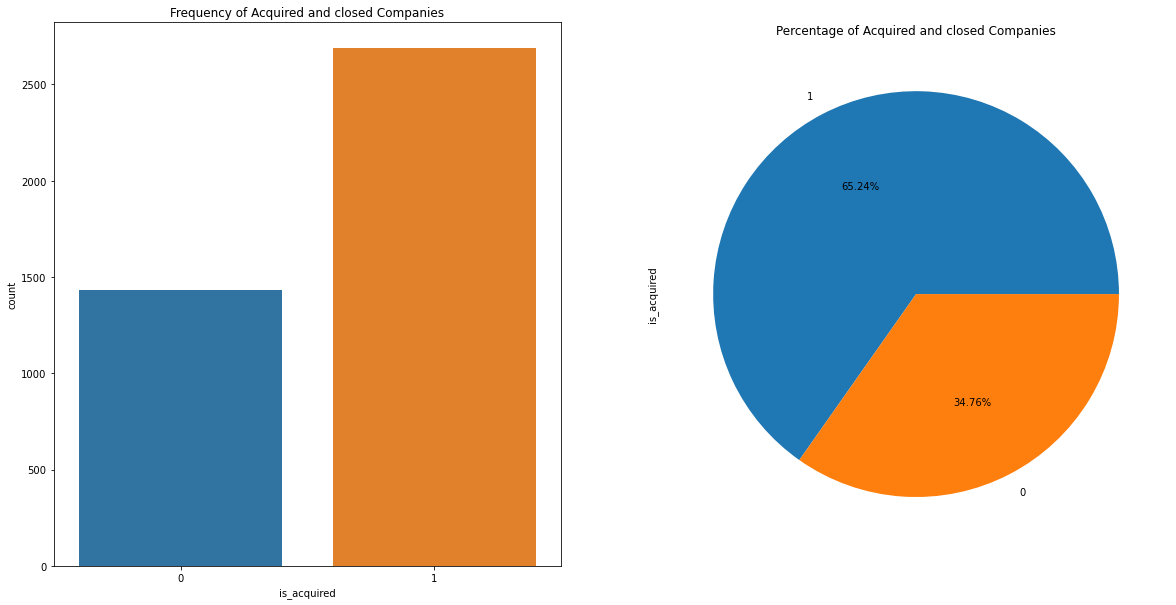

In [69]:
'''
Visualizing the target variable - is_acquired
'''
fig, ax = plt.subplots(1,2,figsize=(20,10))

# Countplot
sns.countplot(x='is_acquired',data=df,ax=ax[0])
ax[0].set_title("Frequency of Acquired and closed Companies")

# Piechart
df['is_acquired'].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.2f%%') 
ax[1].set_title("Percentage of Acquired and closed Companies")

***Observation***: There seem to be more acquired companies than closed companies which creates an imbalance in the classification classes

In [27]:
# Look at correlation of features with the target variable

df.corrwith(df['is_acquired']).sort_values()

seed                   -0.186272
angel                  -0.148213
debt_financing         -0.026011
secondary_market       -0.021348
grant                  -0.009052
convertible_note        0.000821
round_G                 0.001241
product_crowdfunding    0.011373
post_ipo_debt           0.013254
post_ipo_equity         0.014764
equity_crowdfunding     0.016417
round_F                 0.023869
private_equity          0.055512
round_E                 0.056729
undisclosed             0.060261
funding_total_usd       0.064160
round_A                 0.065250
round_D                 0.109334
round_B                 0.144968
round_C                 0.149031
pct_acquired_state      0.161515
funding_rounds          0.198115
venture                 0.241523
pct_acquired_market     0.355630
is_acquired             1.000000
dtype: float64

***Observation***: Seed, and angel funding seem to have a negative correlation with startup success which seems unintuitive. But correlation doesn't imply causation so I will still keep these features in my model

In [28]:
# Setup test, train splits
X = df.drop('is_acquired', axis=1).copy()
y = df['is_acquired'].copy()

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Scaler for the data
scaler = StandardScaler()

#### Logistic Regression model

Setup logistical Regression model!

In [29]:
log_reg_mod = LogisticRegression()
log_reg_pipe = Pipeline(steps=[('scaler',scaler), ('model', log_reg_mod)])
log_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

Make prediction and calculate accuracy

In [30]:
y_pred = log_reg_pipe.predict(X_test)
print(f'Logistic regression classifier Accuracy on train set: {round(log_reg_pipe.score(X_train, y_train) * 100, 2)} %')
print(f'Logistic regression classifier Accuracy on test set: {round(log_reg_pipe.score(X_test, y_test) * 100, 2)} %')

Logistic regression classifier Accuracy on train set: 73.24 %
Logistic regression classifier Accuracy on test set: 73.4 %


Precision and recall

In [31]:
report = metrics.classification_report(
    y_test, log_reg_pipe.predict(X_test),
    target_names=["Closed", "Acquired"]
)
print(report)

              precision    recall  f1-score   support

      Closed       0.66      0.49      0.56       360
    Acquired       0.76      0.87      0.81       670

    accuracy                           0.73      1030
   macro avg       0.71      0.68      0.69      1030
weighted avg       0.73      0.73      0.72      1030



***Observations***: Recall seems really good (0.87) on the acquired startups, but I suspect thats due to the data imbalance in the dataset

Plot ROC curve

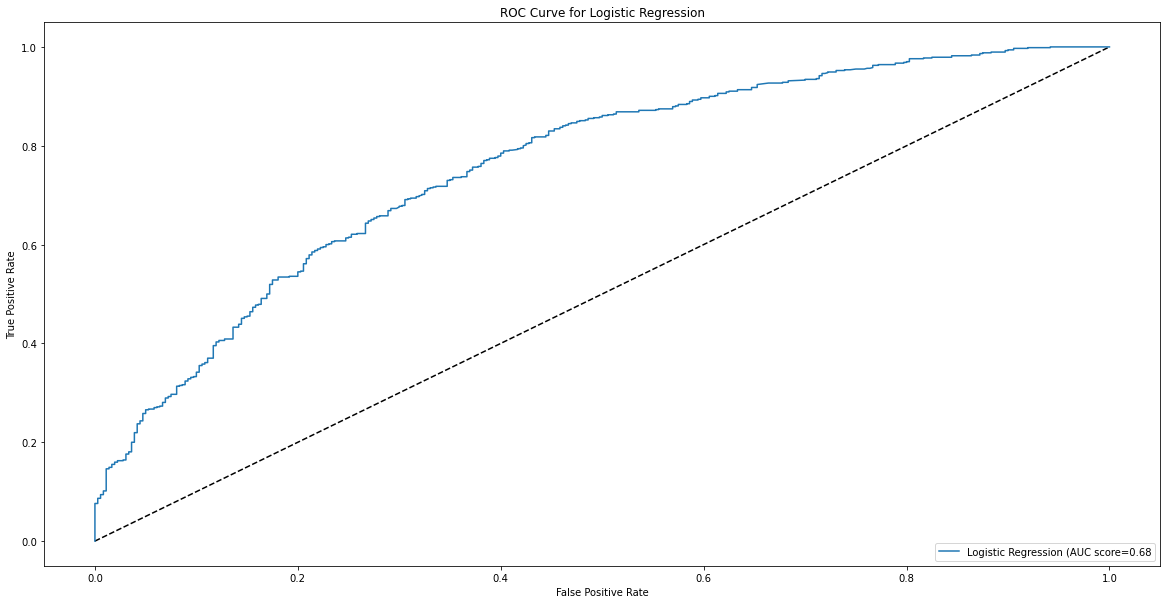

In [32]:
# From lecture notes
ax, fig = plot_roc(log_reg_pipe, X_test, y_test, "Logistic Regression")

***Observations***: The model seems to do a lot better than the random classifier

#### Decision Tree model

Setup logistical Regression model!

In [33]:
dec_tree_mod = DecisionTreeClassifier(criterion="entropy", max_depth=4)
dec_tree_pipe = Pipeline(steps=[('scaler',scaler), ('model', dec_tree_mod)])
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4))])

Make prediction and calculate accuracy

In [34]:
y_pred = dec_tree_pipe.predict(X_test)
print(f'Decision tree classifier Accuracy on train set: {round(dec_tree_pipe.score(X_train, y_train) * 100, 2)} %')
print(f'Decision tree classifier Accuracy on test set: {round(dec_tree_pipe.score(X_test, y_test) * 100, 2)} %')

Decision tree classifier Accuracy on train set: 74.01 %
Decision tree classifier Accuracy on test set: 74.56 %


Precision and recall

In [35]:
report = metrics.classification_report(
    y_test, dec_tree_pipe.predict(X_test),
    target_names=["Closed", "Acquired"]
)
print(report)

              precision    recall  f1-score   support

      Closed       0.67      0.54      0.60       360
    Acquired       0.78      0.86      0.81       670

    accuracy                           0.75      1030
   macro avg       0.72      0.70      0.71      1030
weighted avg       0.74      0.75      0.74      1030



***Observations***: 
- Precision seems to have improved over logistic regression
- Recall for closed startups has improved
- Accuracy has improved

ROC and AUC

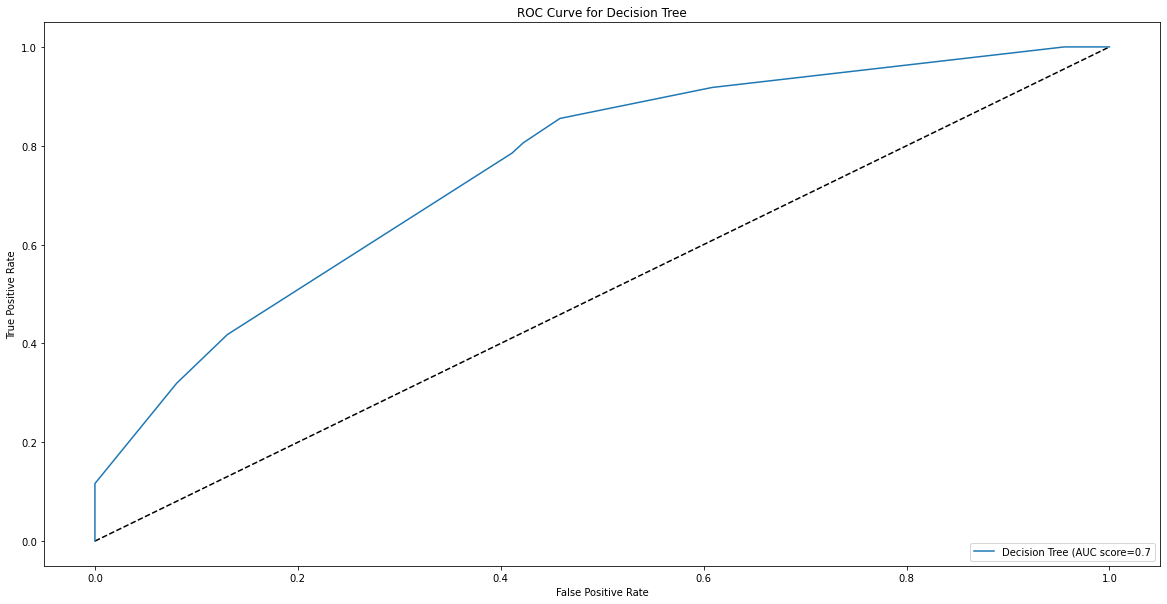

In [36]:
ax, fig = plot_roc(dec_tree_pipe, X_test, y_test, "Decision Tree")

***Observations***: AUC score is better than logistic regression

#### Random Forest

Setting up the model

In [73]:
rand_for_mod = RandomForestClassifier(random_state=40, max_depth=8)
rand_for_pipe = Pipeline(steps=[('scaler',scaler), ('model', rand_for_mod)])
rand_for_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=8, random_state=40))])

Make prediction and calculate accuracy

In [74]:
y_pred = rand_for_pipe.predict(X_test)
print(f'Random forest classifier Accuracy on train set: {round(rand_for_pipe.score(X_train, y_train) * 100, 2)} %')
print(f'Random forest classifier Accuracy on test set: {round(rand_for_pipe.score(X_test, y_test) * 100, 2)} %')

Random forest classifier Accuracy on train set: 78.83 %
Random forest classifier Accuracy on test set: 76.02 %


Precision and recall

In [75]:
report = metrics.classification_report(
    y_test, rand_for_pipe.predict(X_test),
    target_names=["Closed", "Acquired"]
)
print(report)

              precision    recall  f1-score   support

      Closed       0.73      0.49      0.59       360
    Acquired       0.77      0.90      0.83       670

    accuracy                           0.76      1030
   macro avg       0.75      0.70      0.71      1030
weighted avg       0.76      0.76      0.75      1030



***Observations***: 
- Precision has improved for closed startups compared to decision trees
- Recall for acquired startups has increased, but decreased for closed statups
- Accuracy is higher than decision trees

ROC and AUC

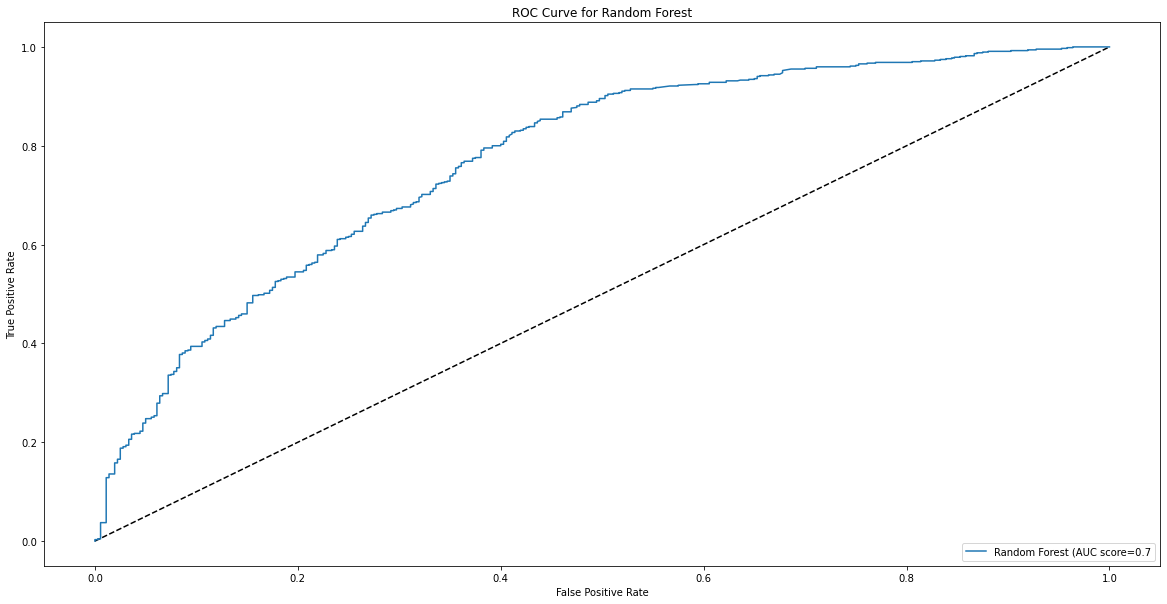

In [76]:
ax, fig = plot_roc(rand_for_pipe, X_test, y_test, "Random Forest")

***Observations***: AUC score is exactly the same as decision trees and the graph looks very similar

Plotting Feature importance

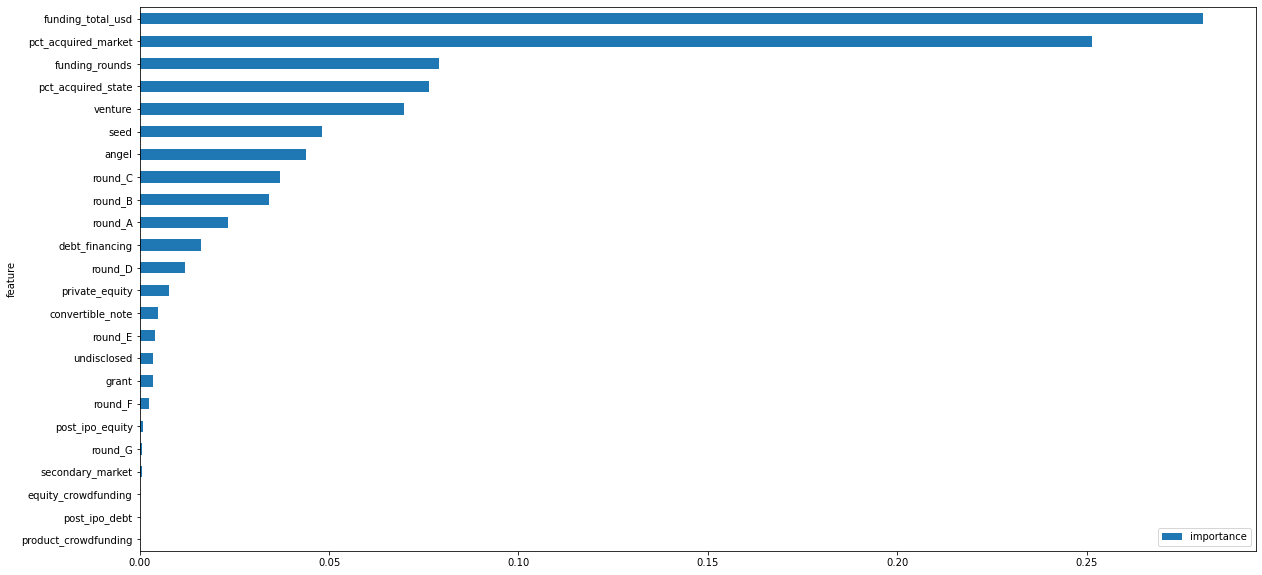

In [77]:
# Get feature names and importances
fnames = df.drop('is_acquired', axis=1).columns
f_imps = rand_for_pipe['model'].feature_importances_

# Create dataframe
fdf = pd.DataFrame()
fdf['feature'] = fnames
fdf['importance'] = f_imps

# Sort values in decreasing order and plot the graph
fdf.sort_values('importance', ascending=True, inplace=True)
fdf.set_index('feature').plot(kind='barh', figsize=(20,10))
plt.legend(loc="lower right")

***Observations***: Seems like trhe features 'round_G', 'equity_crowdfunding', 'post_ipo_debt' and 'product_crowdfunding' were discarded by the model

##### Comapring Logistic regression, Random forest and Decision tree classifiers across ROC and AUC

Text(0.5, 1.0, 'ROC comparison betweenn Logistic Regression, Decision Tree, and Random forest classifiers')

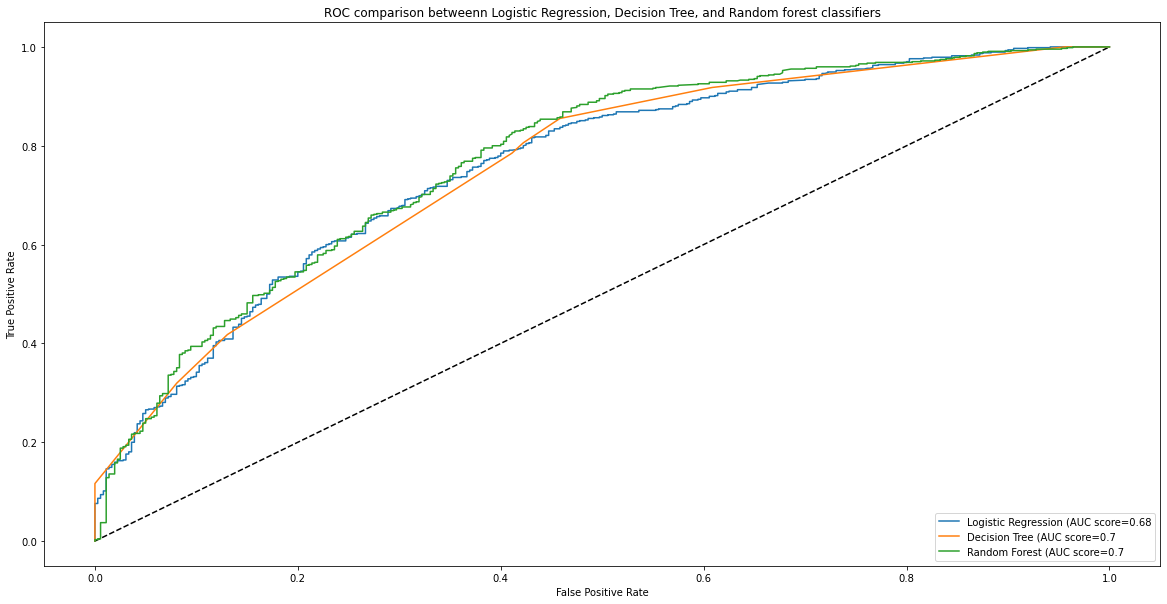

In [78]:
models = {'Logistic Regression': log_reg_pipe,
          'Decision Tree': dec_tree_pipe,
          'Random Forest': rand_for_pipe}

fig, ax = plt.subplots(figsize=(20,10))
ax.plot([0, 1], [0, 1], "k--")

for label, mod in models.items():
    predicted_prob1 = mod.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, predicted_prob1)
    ax.plot(fpr, tpr, label=f"{label} (AUC score={round(metrics.roc_auc_score(y_test, mod.predict(X_test)), 2)}")
     
ax.legend(loc="lower right")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("ROC comparison betweenn Logistic Regression, Decision Tree, and Random forest classifiers")
   

***Observations***: 
- Decision trees and random forest are superior than logistic regression
- Random forest seems overall better than decision trees

### Conclusion
 - Based on the above results, random forest seems to be the best model to predict if a startup is successful
 - The features funding_total_usd, pct_acquired_market seem to be the best indicators for startup success
 - The features 'round_G', 'equity_crowdfunding', 'post_ipo_debt' and 'product_crowdfunding' were not important indicators of startup success 

### Potential Weaknesses
- The data in the dataset was imbalanced which could add some bias to the model
- A startup could be successful even if it is not acquired, so aquisition may not be the only indicator of startup success

In [79]:
# References

# https://www.edureka.co/community/52722/unicodedecodeerror-codec-decode-position-invalid-start-byte to fix error while loading - for fixing error loading dataset
# https://www.kaggle.com/datasets/arindam235/startup-investments-crunchbase?resource=download - dataset
# https://www.codegrepper.com/code-examples/python/pandas+remove+spaces+in+the+column+names - remove spaces from columns
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
# https://seaborn.pydata.org/generated/seaborn.catplot.html
# https://nbviewer.org/github/ajallow625/ML-models-for-the-Prediction-of-Obesity/blob/master/FINAL%20PROJECT.ipynb